In [1]:
!pip install pycocotools

  Using cached Cython-0.29.21-cp37-cp37m-win_amd64.whl (1.6 MB)
  Created wheel for pycocotools: filename=pycocotools-2.0.2-cp37-cp37m-win_amd64.whl size=80483 sha256=ba79ed6b8838063d2d7326174a5def3aa152fb35554b2f2adb2d353b5d33c68f
  Stored in directory: c:\users\ryu\appdata\local\pip\cache\wheels\bc\cf\1b\e95c99c5f9d1648be3f500ca55e7ce55f24818b0f48336adaf
Successfully built pycocotools


In [201]:
import json
from collections import defaultdict

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Polygon, Rectangle, FancyBboxPatch
from matplotlib import patheffects
from matplotlib.collections import PatchCollection
import matplotlib.gridspec as gridspec

with open('./visual/mask_detections.json') as json_file:
    shapes = json.load(json_file)

print(shapes[:2])

[{'image_id': 0, 'category_id': 1, 'segmentation': {'size': [720, 1080], 'counts': 'hZj38`?_1gC;Q;YN]BP2FSO4W1i=kMPBP7P>UIiAm6W>f0O10000000oImAe3S>WLUBe3k=ZLVBf3j=YLVBh3j=WLVBj3j=ULVBl3j=SLVBn3j=RLVBn3j=QLVBP4j=[20000000000O10000001O000000000000000000001O000000000000000000000000000000O1000000000000000000000000000000O10000000000000000001O000000000000000000000000000000000000000000000000000000O10000000000000000000000000000001O0000000000000000000[OWBcHj=X7]BeHc=i5XBPKf>UOPAe1g0B@]O`a0B^Xj`0'}, 'score': 0.9999772310256958}, {'image_id': 0, 'category_id': 1, 'segmentation': {'size': [720, 1080], 'counts': 'joU`0`1ld0n0X[OjM_c0h2ARMU]OQ3ib0oLV]OR3jb0nLU]OS3lb0lLS]OV3Sc0000O10001O000001N1000000000000000000000000000001O0000000000O100000000000000O100O1O1O1N2O100O1000000000000000O100O1O1WOU]OlMlb05\\]O7c0[OSb09b]OOQd0N[1LjUP6'}, 'score': 0.9999572038650513}]


In [203]:
with open('./visual/valid/annotations.json') as json_file:
    shapes = json.load(json_file)

In [216]:
shapes['annotations'][0].keys()

dict_keys(['id', 'image_id', 'category_id', 'segmentation', 'area', 'bbox', 'iscrowd'])

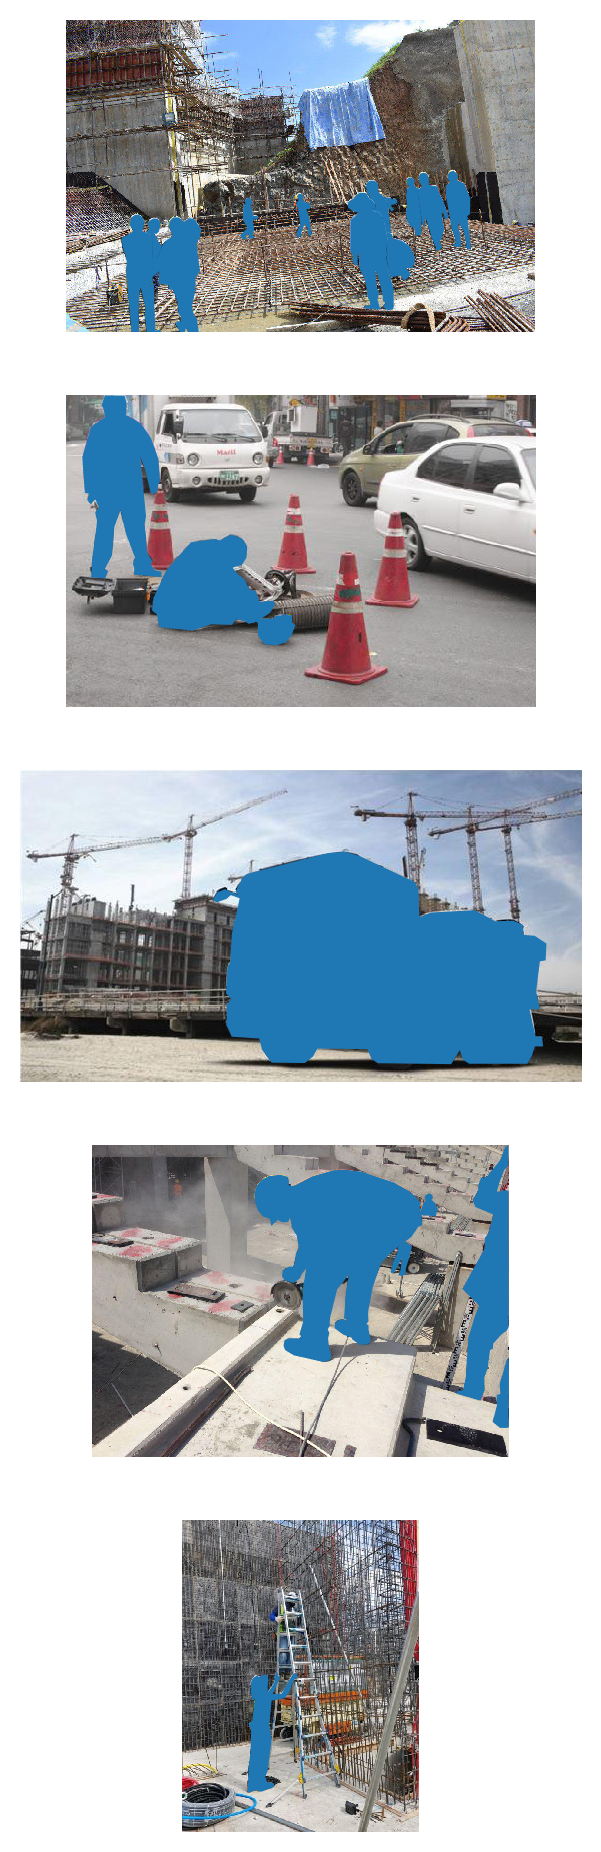

In [247]:
fig, axes = plt.subplots(5, 1, figsize=(5, 12), dpi=200)

for i, image in enumerate(shapes['images']):
    img = Image.open('./visual/valid/' + image['file_name'])
    axes.flatten()[i].imshow(img)
    axes.flatten()[i].axis('off')
    
    for poly in shapes['annotations']:
        if poly['image_id'] == image['id']:
            for poly in poly['segmentation']:
                poly = np.array(poly).reshape((-1, 2))
                if poly.shape[0] != 4: 
                    patch = Polygon(poly, True)
                    axes.flatten()[i].add_patch(patch)

    if i+1 == 5:
        break
        

In [12]:
# with open('./visual/valid/annotations.json') as json_file:
#     shapes = json.load(json_file)

In [73]:
import pycocotools

pycocotools._mask.decode(shapes[0]['segmentation']['counts'])

TypeError: string indices must be integers

In [93]:
values = shapes[0]['segmentation']['counts']
values

'hZj38`?_1gC;Q;YN]BP2FSO4W1i=kMPBP7P>UIiAm6W>f0O10000000oImAe3S>WLUBe3k=ZLVBf3j=YLVBh3j=WLVBj3j=ULVBl3j=SLVBn3j=RLVBn3j=QLVBP4j=[20000000000O10000001O000000000000000000001O000000000000000000000000000000O1000000000000000000000000000000O10000000000000000001O000000000000000000000000000000000000000000000000000000O10000000000000000000000000000001O0000000000000000000[OWBcHj=X7]BeHc=i5XBPKf>UOPAe1g0B@]O`a0B^Xj`0'

In [97]:
shapes[0]['segmentation']

{'size': [720, 1080],
 'counts': 'hZj38`?_1gC;Q;YN]BP2FSO4W1i=kMPBP7P>UIiAm6W>f0O10000000oImAe3S>WLUBe3k=ZLVBf3j=YLVBh3j=WLVBj3j=ULVBl3j=SLVBn3j=RLVBn3j=QLVBP4j=[20000000000O10000001O000000000000000000001O000000000000000000000000000000O1000000000000000000000000000000O10000000000000000001O000000000000000000000000000000000000000000000000000000O10000000000000000000000000000001O0000000000000000000[OWBcHj=X7]BeHc=i5XBPKf>UOPAe1g0B@]O`a0B^Xj`0'}

In [94]:
decoded = base64.b64decode(shapes[0]['segmentation']['counts'])
decoded

b'\x85\x98\xf7\xf3X\x02A\x83A?aR;\x85\xb5\x8aC\x0f\x04\xfe\xcfP\x88\x80\x9b\xa5\x9f\xd0\xedt\xd3M4\xd3J\x08\x98\x07\xb7Ib\xd4\x05\xed\xe4d\xb5A\x7fx'

In [180]:
shapes[0]

{'image_id': 0,
 'category_id': 1,
 'segmentation': {'size': [720, 1080],
  'counts': 'hZj38`?_1gC;Q;YN]BP2FSO4W1i=kMPBP7P>UIiAm6W>f0O10000000oImAe3S>WLUBe3k=ZLVBf3j=YLVBh3j=WLVBj3j=ULVBl3j=SLVBn3j=RLVBn3j=QLVBP4j=[20000000000O10000001O000000000000000000001O000000000000000000000000000000O1000000000000000000000000000000O10000000000000000001O000000000000000000000000000000000000000000000000000000O10000000000000000000000000000001O0000000000000000000[OWBcHj=X7]BeHc=i5XBPKf>UOPAe1g0B@]O`a0B^Xj`0'},
 'score': 0.9999772310256958}

In [74]:
from pycocotools import coco

ground_truth_binary_mask = coco.maskUtils.decode(shapes[0]['segmentation'])

In [190]:
ground_truth_binary_mask = coco.maskUtils.decode(shapes[0]['segmentation'])

In [194]:
mask.decode(shapes[0]['segmentation'])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [192]:
import json
import numpy as np
from pycocotools import mask
from skimage import measure

fortran_ground_truth_binary_mask = np.asfortranarray(ground_truth_binary_mask)
encoded_ground_truth = mask.encode(fortran_ground_truth_binary_mask)
ground_truth_area = mask.area(encoded_ground_truth)
ground_truth_bounding_box = mask.toBbox(encoded_ground_truth)
contours = measure.find_contours(ground_truth_binary_mask, 0.5)

annotation = {
        "segmentation": [],
        "area": ground_truth_area.tolist(),
        "iscrowd": 0,
        "image_id": 123,
        "bbox": ground_truth_bounding_box.tolist(),
        "category_id": 1,
        "id": 1
    }

for contour in contours:
    contour = np.flip(contour, axis=1)
    segmentation = contour.ravel().tolist()
    annotation["segmentation"].append(segmentation)

In [100]:
rle = mask.frPyObjects(shapes[0]['segmentation'], 720, 1080)
m = mask.decode(rle)

ValueError: invalid literal for int() with base 10: 'hZj38`?_1gC;Q;YN]BP2FSO4W1i=kMPBP7P>UIiAm6W>f0O10000000oImAe3S>WLUBe3k=ZLVBf3j=YLVBh3j=WLVBj3j=ULVBl3j=SLVBn3j=RLVBn3j=QLVBP4j=[20000000000O10000001O000000000000000000001O0000000000000000000000000000

In [128]:
aa = np.array([int("{:08b}".format(x)) for x in decoded])


In [125]:
from pycocotools import cocoeval

In [154]:
shapes[0]['segmentation']

{'size': [720, 1080],
 'counts': 'hZj38`?_1gC;Q;YN]BP2FSO4W1i=kMPBP7P>UIiAm6W>f0O10000000oImAe3S>WLUBe3k=ZLVBf3j=YLVBh3j=WLVBj3j=ULVBl3j=SLVBn3j=RLVBn3j=QLVBP4j=[20000000000O10000001O000000000000000000001O000000000000000000000000000000O1000000000000000000000000000000O10000000000000000001O000000000000000000000000000000000000000000000000000000O10000000000000000000000000000001O0000000000000000000[OWBcHj=X7]BeHc=i5XBPKf>UOPAe1g0B@]O`a0B^Xj`0'}

In [172]:
coco.maskUtils.frPyObjects(shapes[0]['segmentation'], 1080, 720)

ValueError: invalid literal for int() with base 10: 'hZj38`?_1gC;Q;YN]BP2FSO4W1i=kMPBP7P>UIiAm6W>f0O10000000oImAe3S>WLUBe3k=ZLVBf3j=YLVBh3j=WLVBj3j=ULVBl3j=SLVBn3j=RLVBn3j=QLVBP4j=[20000000000O10000001O000000000000000000001O0000000000000000000000000000

In [164]:
shapes[0]['segmentation']['counts']

'hZj38`?_1gC;Q;YN]BP2FSO4W1i=kMPBP7P>UIiAm6W>f0O10000000oImAe3S>WLUBe3k=ZLVBf3j=YLVBh3j=WLVBj3j=ULVBl3j=SLVBn3j=RLVBn3j=QLVBP4j=[20000000000O10000001O000000000000000000001O000000000000000000000000000000O1000000000000000000000000000000O10000000000000000001O000000000000000000000000000000000000000000000000000000O10000000000000000000000000000001O0000000000000000000[OWBcHj=X7]BeHc=i5XBPKf>UOPAe1g0B@]O`a0B^Xj`0'

In [ ]:
coco.maskUtils.decode

In [148]:
coco.maskUtils.area(shapes[4]['segmentation'])

26062

In [138]:
coco.COCO.annToRLE(shapes[0])

TypeError: annToRLE() missing 1 required positional argument: 'ann'

In [132]:
cocoeval.maskUtils.frPyObjects(shapes[0]['segmentation'], 720, 1080)

ValueError: invalid literal for int() with base 10: 'hZj38`?_1gC;Q;YN]BP2FSO4W1i=kMPBP7P>UIiAm6W>f0O10000000oImAe3S>WLUBe3k=ZLVBf3j=YLVBh3j=WLVBj3j=ULVBl3j=SLVBn3j=RLVBn3j=QLVBP4j=[20000000000O10000001O000000000000000000001O0000000000000000000000000000

In [118]:
np.ascontiguousarray(np.array([int("{:08b}".format(x)) for x in decoded])
)

array([10000101, 10011000, 11110111, 11110011,  1011000,       10,
        1000001, 10000011,  1000001,   111111,  1100001,  1010010,
         111011, 10000101, 10110101, 10001010,  1000011,     1111,
            100, 11111110, 11001111,  1010000, 10001000, 10000000,
       10011011, 10100101, 10011111, 11010000, 11101101,  1110100,
       11010011,  1001101,   110100, 11010011,  1001010,     1000,
       10011000,      111, 10110111,  1001001,  1100010, 11010100,
            101, 11101101, 11100100,  1100100, 10110101,  1000001,
        1111111,  1111000])

In [106]:
shapes[0]['segmentation']

{'size': [720, 1080],
 'counts': 'hZj38`?_1gC;Q;YN]BP2FSO4W1i=kMPBP7P>UIiAm6W>f0O10000000oImAe3S>WLUBe3k=ZLVBf3j=YLVBh3j=WLVBj3j=ULVBl3j=SLVBn3j=RLVBn3j=QLVBP4j=[20000000000O10000001O000000000000000000001O000000000000000000000000000000O1000000000000000000000000000000O10000000000000000001O000000000000000000000000000000000000000000000000000000O10000000000000000000000000000001O0000000000000000000[OWBcHj=X7]BeHc=i5XBPKf>UOPAe1g0B@]O`a0B^Xj`0'}

In [107]:
np.asfortranarray(shapes[0]['segmentation']['counts'])

array(['hZj38`?_1gC;Q;YN]BP2FSO4W1i=kMPBP7P>UIiAm6W>f0O10000000oImAe3S>WLUBe3k=ZLVBf3j=YLVBh3j=WLVBj3j=ULVBl3j=SLVBn3j=RLVBn3j=QLVBP4j=[20000000000O10000001O000000000000000000001O000000000000000000000000000000O1000000000000000000000000000000O10000000000000000001O000000000000000000000000000000000000000000000000000000O10000000000000000000000000000001O0000000000000000000[OWBcHj=X7]BeHc=i5XBPKf>UOPAe1g0B@]O`a0B^Xj`0'],
      dtype='<U407')

In [82]:
"".join("{:08b}".format(x) for x in decoded)

'1000010110011000111101111111001101011000000000100100000110000011010000010011111101100001010100100011101110000101101101011000101001000011000011110000010011111110110011110101000010001000100000001001101110100101100111111101000011101101011101001101001101001101001101001101001101001010000010001001100000000111101101110100100101100010110101000000010111101101111001000110010010110101010000010111111101111000'

In [ ]:
"".join("{:08b}".format(x) for x in decoded)

In [83]:
pycocotools.mask.frPyObjects("".join("{:08b}".format(x) for x in decoded), 720, 1080)

Exception: input type is not supported.

In [113]:
pycocotools._mask.frUncompressedRLE(dd, 720, 1080)

TypeError: 'generator' object is not subscriptable

In [77]:
coco.annToRLE()

AttributeError: module 'pycocotools.coco' has no attribute 'annToRLE'

'1000010110011000111101111111001101011000000000100100000110000011010000010011111101100001010100100011101110000101101101011000101001000011000011110000010011111110110011110101000010001000100000001001101110100101100111111101000011101101011101001101001101001101001101001101001101001010000010001001100000000111101101110100100101100010110101000000010111101101111001000110010010110101010000010111111101111000'

In [65]:
import zlib

In [69]:
zlib.decompress(decoded)

error: Error -3 while decompressing data: incorrect header check

In [61]:
binary = np.array([int("{:08b}".format(x)) for x in decoded])
binary

array([10000101, 10011000, 11110111, 11110011,  1011000,       10,
        1000001, 10000011,  1000001,   111111,  1100001,  1010010,
         111011, 10000101, 10110101, 10001010,  1000011,     1111,
            100, 11111110, 11001111,  1010000, 10001000, 10000000,
       10011011, 10100101, 10011111, 11010000, 11101101,  1110100,
       11010011,  1001101,   110100, 11010011,  1001010,     1000,
       10011000,      111, 10110111,  1001001,  1100010, 11010100,
            101, 11101101, 11100100,  1100100, 10110101,  1000001,
        1111111,  1111000])

OverflowError: Python int too large to convert to C long

In [55]:
from pycocotools import mask

In [64]:
mask.decode(np.uint8(binary))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [51]:
pycocotools._mask.frPyObjects(shapes[0]['segmentation'], 720, 1080)

Exception: input type is not supported.

In [47]:
int.from_bytes(decoded, 'b')

ValueError: byteorder must be either 'little' or 'big'

In [42]:
pycocotools._mask(

TypeError: Argument 'mask' has incorrect type (expected numpy.ndarray, got bytes)

In [33]:
pycocotools._mask.frUncompressedRLE(base64.b64decode(shapes[0]['segmentation']['counts']), 720, 1080)

TypeError: 'int' object is not subscriptable

In [31]:
import base64

In [30]:
pycocotools._mask.frPyObjects(shapes[0]['segmentation'], 720, 1080)

ValueError: invalid literal for int() with base 10: 'hZj38`?_1gC;Q;YN]BP2FSO4W1i=kMPBP7P>UIiAm6W>f0O10000000oImAe3S>WLUBe3k=ZLVBf3j=YLVBh3j=WLVBj3j=ULVBl3j=SLVBn3j=RLVBn3j=QLVBP4j=[20000000000O10000001O000000000000000000001O0000000000000000000000000000

In [199]:
[[i * 2 ** (j / 3.0) for j in range(3)] for i in [24, 48, 96, 192, 384]],

([[24.0, 30.238105197476955, 38.097625247236785],
  [48.0, 60.47621039495391, 76.19525049447357],
  [96.0, 120.95242078990782, 152.39050098894714],
  [192.0, 241.90484157981564, 304.7810019778943],
  [384.0, 483.8096831596313, 609.5620039557886]],)

In [200]:
[[i * 2 ** (j / 3.0) for j in range(3)] for i in [32, 64, 128, 256, 512]],

([[32.0, 40.31747359663594, 50.79683366298238],
  [64.0, 80.63494719327188, 101.59366732596476],
  [128.0, 161.26989438654377, 203.18733465192952],
  [256.0, 322.53978877308754, 406.37466930385904],
  [512.0, 645.0795775461751, 812.7493386077181]],)

In [22]:
shapes[0]['segmentation']['counts']

'hZj38`?_1gC;Q;YN]BP2FSO4W1i=kMPBP7P>UIiAm6W>f0O10000000oImAe3S>WLUBe3k=ZLVBf3j=YLVBh3j=WLVBj3j=ULVBl3j=SLVBn3j=RLVBn3j=QLVBP4j=[20000000000O10000001O000000000000000000001O000000000000000000000000000000O1000000000000000000000000000000O10000000000000000001O000000000000000000000000000000000000000000000000000000O10000000000000000000000000000001O0000000000000000000[OWBcHj=X7]BeHc=i5XBPKf>UOPAe1g0B@]O`a0B^Xj`0'

In [12]:
boxes_by_ids = defaultdict(list)
for shape in shapes:
    boxes_by_ids[shape['image_id']].append(shape['bbox'])

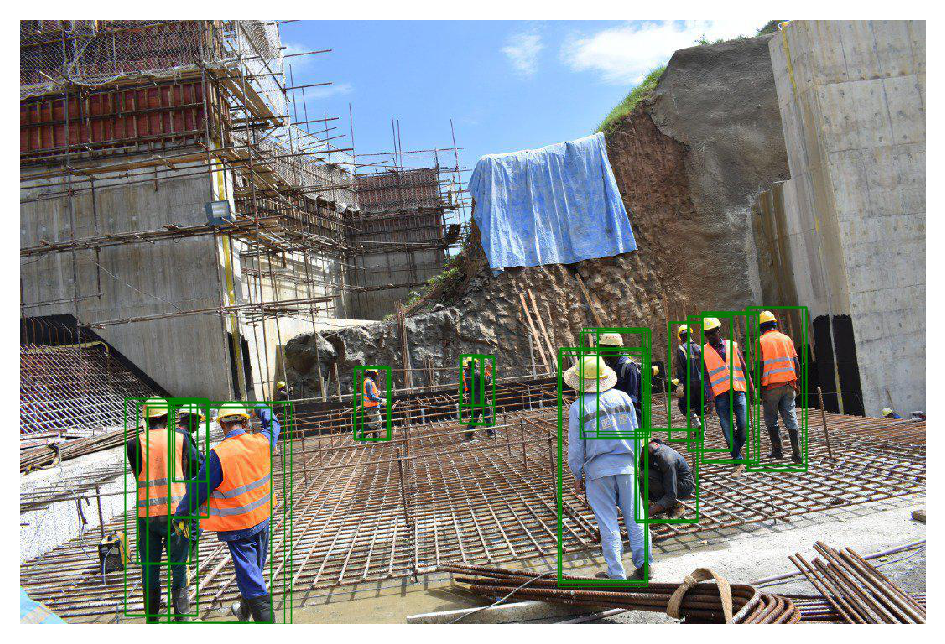

In [13]:
fig, ax = plt.subplots(dpi=200)

image = Image.open('./visual/valid/JPEGImages/00000016.jpg')
ax.imshow(image)

rectangles = []
for box in boxes_by_ids[0]:
    rectangle = Rectangle((box[0], box[1]), box[2], box[3])
    rectangles.append(rectangle)
        
pc = PatchCollection(rectangles, edgecolor='g', lw=0.5, facecolor='none')
ax.add_collection(pc)
ax.axis('off')
plt.show()